# 5.5 用梯度下降法求解一元线性回归

### 1.任务描述

一组房屋面积的数据如下（16个）：

137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21。

与房屋面积对应的房屋价格的数据如下（16个）：

145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,
69.65,75.69,95.30

要求：
- 建立一元线性回归模型
- 选择均方误差损失函数计算损失
- 使用TensorFlow自动求导功能进行求导
- 使用梯度下降法求解模型
- 对损失进行可视化
- 使用模型对新的房屋预测价格。

### 2.知识准备

见教程。

### 3.任务分析

1. 建立模型

假设房屋价格只与房屋面积相关，并且是线性的，建立回归模型：$y=wx+b$，式中，y为预测结果，x为特征，w和b为待求参数。



2. 选择损失函数

选择均方误差损失函数，公式如下：

$Loss=\sum_{i=1}^{n}{(y_i-\hat{y}_i)}^2=\frac{1}{2n}\sum_{i=1}^{n}{[y_i-(wx_i+b)]}^2$

式中，$y_i$为标签值，$\hat{y}_i$为预测值。

3. 权值更新公式

$w^{k+1}=w^{(k)}-\eta \frac{\partial Loss(w,b)}{\partial w} $

$b^{k+1}=b^{(k)}-\eta \frac{\partial Loss(w,b)}{\partial b} $

由于

$\frac{\partial Loss}{\partial w}=\sum_{i=1}^{n}(y_i-b-wx_i)(-x_i) $

$\frac{\partial Loss}{\partial b}=\sum_{i=1}^{n}(y_i-b-wx_i)(-1) $

所以权值更新公式为：

$w^{(k+1)}=w^{(k)}-\eta\sum_{i=1}^{n}x_i(wx_i+b-y_i)$

$b^{(k+1)}=b^{(k)}-\eta\sum_{i=1}^{n}(wx_i+b-y_i)$

### 4.任务实施


执行代码

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.013377065> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.1628988>
0 4749.3623 0.08256537 -1.1619666
20 161.90521 0.8486122 -1.1544623
40 90.29297 0.9443225 -1.1534352
60 89.17503 0.9562799 -1.1532173
80 89.157524 0.957773 -1.1531007
tf.Tensor(89.852806, shape=(), dtype=float32)


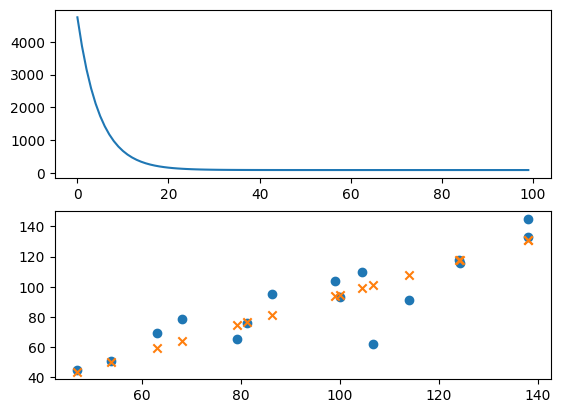

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 1，加载数据
# 面积
x=tf.constant([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
# 价格
y=tf.constant([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

# 2，设置超参数
# 学习率
learn_rate=0.00001
# 迭代次数
iter=100
# 显示频率
display_step=20

# 3，模型参数初始化
np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())
print(w,b)
# 4，训练模型
# 损失列表
mse=[]
# 迭代训练
for i in range(0,iter):
    with tf.GradientTape() as tape:
        # 预测值
        pred =w*x + b
        # 均方误差损失函数
        Loss=0.5*tf.reduce_mean(tf.square(y-pred))
    # 将损失添加到列表
    mse.append(Loss)
    # 求导
    dL_dw,dL_db=tape.gradient(Loss,[w,b])
    # 参数更新
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    # 打印迭代中的损失和模型参数
    if i%display_step==0:
        print(i,Loss.numpy(),w.numpy(),b.numpy())
        

# 5，可视化
# 绘制损失函数折线图
plt.subplot(211)
plt.plot(mse)    
# 输出散点图
plt.subplot(212)
# 打印真实值
plt.scatter(x,y)
# # 打印预测值
plt.scatter(x,w*x+b,marker='x')
# 6，预测
# 面积为95平方米
area=95
# 使用模型参数计算价格
price=area*w+b
print(price)